In [1]:
import pandas as pd
import numpy as np
import scipy.io
import statsmodels.api as sm

from matplotlib import cm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata
import matplotlib.colors as colors

C:\Users\irmew01\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\irmew01\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


In [11]:
df = pd.read_csv("./output/ek-us-cross-section.csv")

In [12]:
df.head()

,income,assets,homeshare,expenditure,x1,x2,x3,x4,x5,x6,...,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19
0,9.127883,7.313131,0.948669,2.522568,-4.231691,-4.671640,-5.328414,-3.323371,-4.860235,-4.454928,...,-3.756799,-3.295822,-4.968285,-4.630506,-4.707697,-4.787262,-4.212108,-4.289164,-3.707833,-0.077662
1,9.437342,6.626263,0.947881,2.548468,-4.210689,-4.647821,-5.300544,-3.302441,-4.828325,-4.432466,...,-3.738483,-3.280109,-4.942803,-4.606899,-4.683692,-4.762875,-4.191202,-4.267750,-3.689743,-0.078378
2,8.149160,6.969697,0.893933,2.128291,-4.643002,-5.127286,-5.850163,-3.596238,-5.328971,-4.893641,...,-4.111153,-3.561701,-5.457813,-5.081961,-5.167005,-5.256536,-4.621247,-4.699889,-4.047533,-0.180451
3,7.281007,6.111111,0.899816,2.048684,-4.736090,-5.232333,-5.973736,-3.667883,-5.438940,-4.983264,...,-4.192930,-3.632180,-5.571311,-5.175869,-5.272854,-5.354440,-4.713938,-4.794039,-4.127617,-0.174134
4,6.412854,5.252525,0.905908,1.966568,-4.829266,-5.337742,-6.099517,-3.747090,-5.549557,-5.093092,...,-4.274571,-3.710153,-5.686134,-5.290560,-5.379098,-5.474075,-4.806699,-4.898720,-4.216507,-0.167405


In [13]:
poor = df.expenditure < df.expenditure.quantile(0.25)

rich = df.expenditure > df.expenditure.quantile(0.75)

In [14]:
print("Rich Home Share: ", round(1 - df.homeshare[rich].median(), 3))

print("Poor Home Share: ", round(1 - df.homeshare[poor].median(), 3))

print("Rich Elasticity: ", round(df.x2[rich].median(), 3))

print("Poor Elasticity: ", round(df.x2[poor].median(), 3))

Rich Home Share:  0.052
Poor Home Share:  0.043
Rich Elasticity:  -6.264
Poor Elasticity:  -13.165


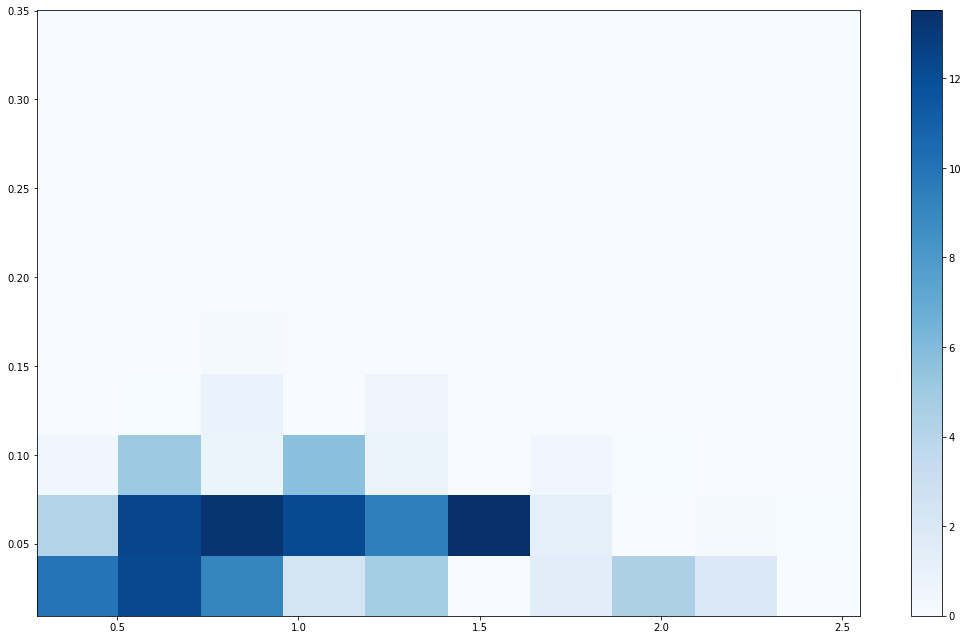

In [15]:
fig, ax = plt.subplots(figsize = [15.0,9.0], tight_layout = True)

h = ax.hist2d(df.expenditure, (1 - df.homeshare), bins=10, cmap='Blues', density = True)

fig.colorbar(h[3], ax=ax)

# ax.set_ylim(0.045,0.20)
# ax.set_xlim(0.35,2.0)

plt.show()

In [16]:
#define response variable
y = (1 - df.homeshare)

#define predictor variables
x = df.expenditure

#add constant to predictor variables
x = sm.add_constant(x)

#fit linear regression model
model = sm.OLS(y, x).fit()

#view model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              homeshare   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     1774.
Date:                Tue, 08 Aug 2023   Prob (F-statistic):               0.00
Time:                        13:57:52   Log-Likelihood:             2.3031e+05
No. Observations:              100000   AIC:                        -4.606e+05
Df Residuals:                   99998   BIC:                        -4.606e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0449      0.000    236.251      

C:\Users\irmew01\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


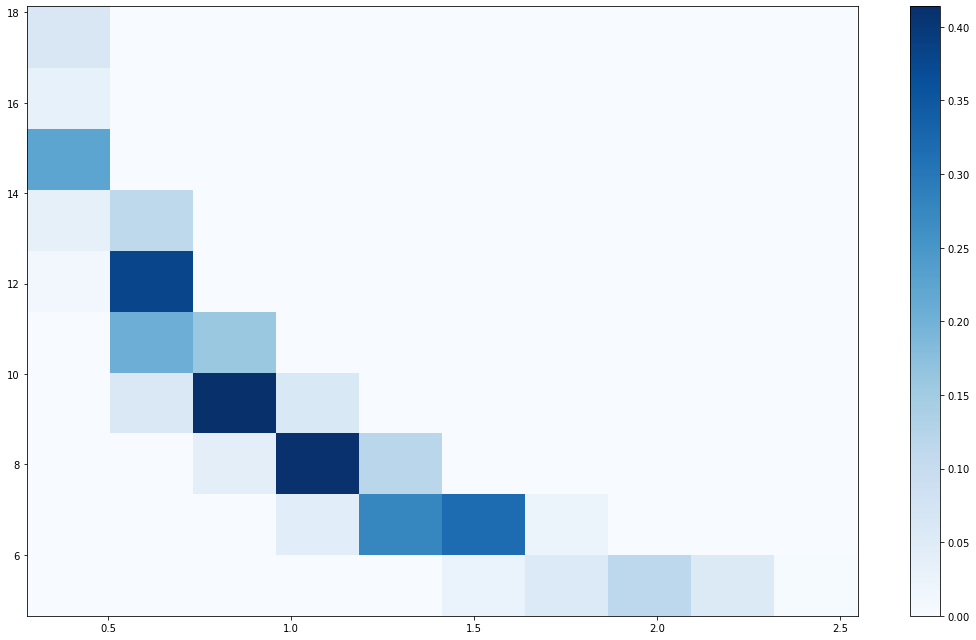

In [17]:
fig, ax = plt.subplots(figsize = [15.0,9.0], tight_layout = True)

h = ax.hist2d(df.expenditure, (- df.x2), bins=10, cmap='Blues', density = True)

fig.colorbar(h[3], ax=ax)

plt.show()